In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [22]:
# importer le dataframe
df = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv')

In [23]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.shape

(768, 9)

In [25]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

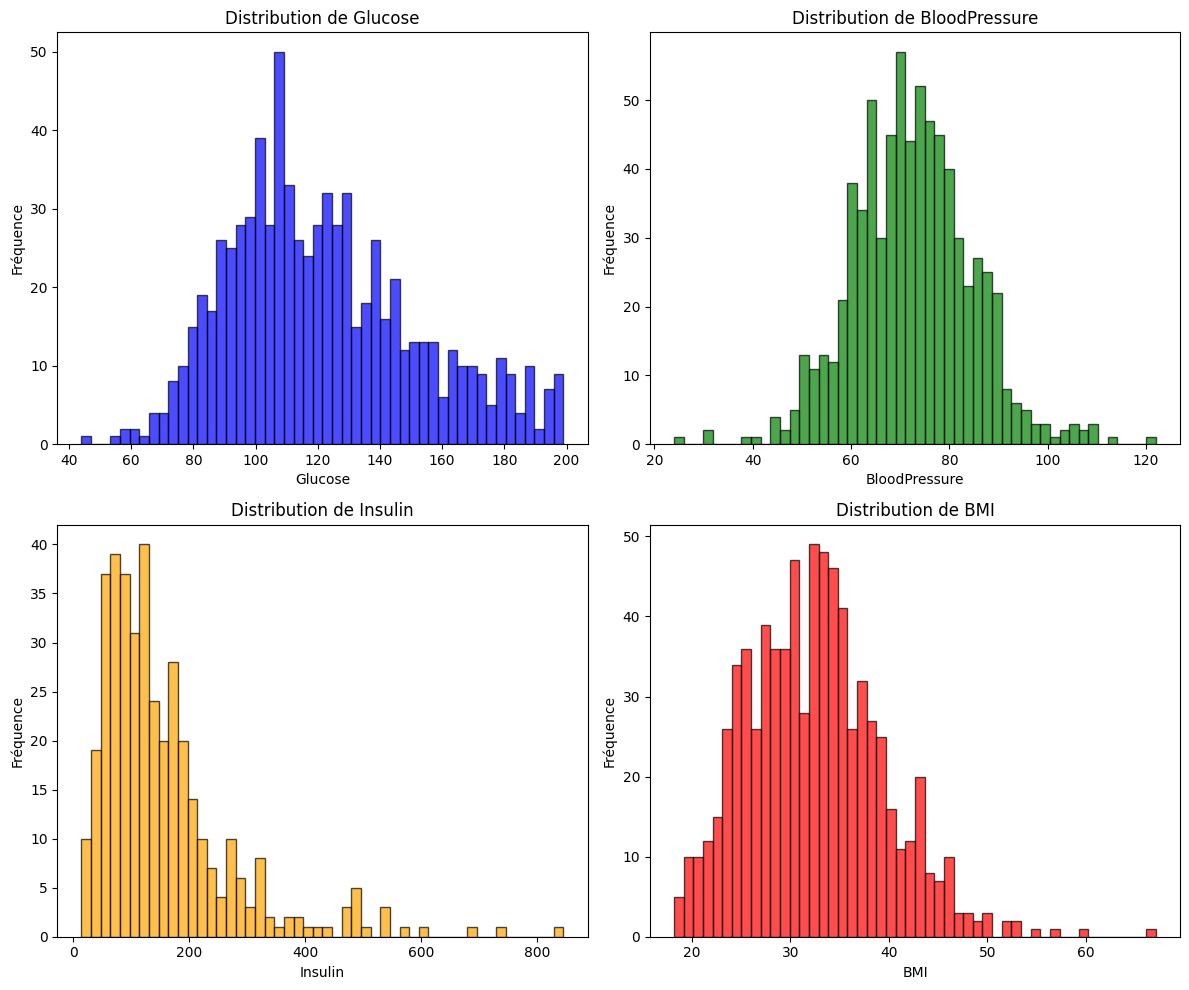

In [29]:
# Création du plot avec 4 subplots pour voir la distribution de mes colonne contenant des 0.
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot de la distribution de Glucose
axs[0, 0].hist(df['Glucose'][df['Glucose'] != 0], bins=50, edgecolor='k', alpha=0.7, color='blue')
axs[0, 0].set_title('Distribution de Glucose')
axs[0, 0].set_xlabel('Glucose')
axs[0, 0].set_ylabel('Fréquence')

# distribution de BloodPressure
axs[0, 1].hist(df['BloodPressure'][df['BloodPressure'] != 0], bins=50, edgecolor='k', alpha=0.7, color='green')
axs[0, 1].set_title('Distribution de BloodPressure')
axs[0, 1].set_xlabel('BloodPressure')
axs[0, 1].set_ylabel('Fréquence')

# distribution de Insulin
axs[1, 0].hist(df['Insulin'][df['Insulin'] != 0], bins=50, edgecolor='k', alpha=0.7, color='orange')
axs[1, 0].set_title('Distribution de Insulin')
axs[1, 0].set_xlabel('Insulin')
axs[1, 0].set_ylabel('Fréquence')

# distribution de BMI
axs[1, 1].hist(df['BMI'][df['BMI'] != 0], bins=50, edgecolor='k', alpha=0.7, color='red')
axs[1, 1].set_title('Distribution de BMI')
axs[1, 1].set_xlabel('BMI')
axs[1, 1].set_ylabel('Fréquence')

# Ajustement des subplots pour éviter le chevauchement
plt.tight_layout()

plt.show()

In [30]:
# Mesure des Skewness
df[['Glucose', 'BloodPressure', 'Insulin','BMI']].skew()

Glucose          0.173754
BloodPressure   -1.843608
Insulin          2.272251
BMI             -0.428982
dtype: float64

L'interprétation des valeurs de skewness (asymétrie) pour décider de remplacer les valeurs nulles (zéros) par la moyenne ou la médiane dépend de la distribution des données. Voici comment interpréter chaque valeur de skewness et prendre une décision appropriée :

Skewness proche de 0 : Les données sont à peu près symétriques. La moyenne et la médiane sont proches l'une de l'autre. Utiliser la moyenne ou la médiane est généralement acceptable.

Skewness négative (inférieure à -1) : Les données sont asymétriques à gauche (queue longue à gauche). Il est préférable d'utiliser la médiane pour remplacer les valeurs nulles.

Skewness positive (supérieure à 1) : Les données sont asymétriques à droite (queue longue à droite). Il est préférable d'utiliser la médiane pour remplacer les valeurs nulles.

**Interprétation des Skewness des colonnes**

Glucose (skewness = 0.173754) :

La skewness est proche de 0, indiquant une distribution à peu près symétrique. Vous pouvez utiliser soit la moyenne, soit la médiane pour remplacer les zéros.

BloodPressure (skewness = -1.843608) :

La skewness est fortement négative, indiquant une distribution asymétrique à gauche. Il est préférable d'utiliser la médiane pour remplacer les zéros.

Insulin (skewness = 2.272251) :

La skewness est fortement positive, indiquant une distribution asymétrique à droite. Il est préférable d'utiliser la médiane pour remplacer les zéros.

BMI (skewness = -0.428982) :

La skewness est légèrement négative, mais proche de 0. Nous pouvons utiliser soit la moyenne, soit la médiane pour remplacer les zéros.

In [31]:
# Remplacer les zéros par la moyenne ou la médiane selon la skewness
columns_skewness = {
    'Glucose': 0.173754,
    'BloodPressure': -1.843608,
    'Insulin': 2.272251,
    'BMI': -0.428982
}

for column, skewness in columns_skewness.items():
    if abs(skewness) < 1:  # Skewness proche de 0 : utiliser la moyenne
        replacement_value = df[df[column] != 0][column].mean()
    else:  # Skewness éloignée de 0 : utiliser la médiane
        replacement_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, replacement_value)

## Donc SkinThickness  n'est pas un marqueur pour le Diabète. Donc Drop

In [32]:
df.drop(columns= 'SkinThickness', inplace=True)

In [33]:
# Afficher la matrice de corrélation avec une heatmap
fig = px.imshow(df.corr(),
                text_auto=True,
                aspect="auto",
                color_continuous_scale='blues',
                title='Matrice de corrélation')
# Ajuster la taille de la figure pour qu'elle soit carrée
fig.update_layout(
    width=800,
    height=800
)
fig.show()

px.imshow est utilisé pour créer une heatmap à partir de la matrice de corrélation.


text_auto=True permet d'afficher les valeurs de corrélation directement sur la heatmap.


aspect="auto" ajuste l'aspect de la heatmap.


In [34]:
# Une vue globale des variables
fig = px.scatter_matrix(
    df,
    dimensions=['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin',
                'BMI', 'DiabetesPedigreeFunction', 'Age'],
    color='Outcome',
    color_continuous_scale='bluered'
)

fig.update_layout(
    width=1200,
    height=1000
)

fig.show()

In [35]:
# Visualisation des outliers en concidérant les zéros
fig = px.box(df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
                'DiabetesPedigreeFunction', 'Age']], title='Visualisation des Outliers')
fig.show()

In [36]:
# Visualisation des outliers en concidérant les zéros
fig = px.box(df['Insulin'], title='Visualisation des Outliers de Insulin')
fig.show()

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


variables = ['Pregnancies', 'Glucose', 'BloodPressure',
 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Créer une figure avec sous-graphiques
fig = make_subplots(rows=2, cols=4, subplot_titles=variables)

# Ajouter un box plot pour chaque variable
for i, var in enumerate(variables):
    row = i // 4 + 1
    col = i % 4 + 1
    fig.add_trace(
        go.Box(y=df[df['Outcome'] == 0][var], name='Non Malade', marker_color='blue'),
        row=row, col=col
    )
    fig.add_trace(
        go.Box(y=df[df['Outcome'] == 1][var], name='Malade', marker_color='red'),
        row=row, col=col
    )

# Mettre à jour la disposition de la figure
fig.update_layout(height=600, width=1000, title_text="Comparaison des diagnostics pour chaque variable")
fig.show()


In [38]:
# faire le test Kruskal-Wallis encore pour toute mes variables
for var in df.columns:
  group1 = df[df['Outcome'] == 0][var]
  group2 = df[df['Outcome'] == 1][var]
  p_value = kruskal(group1, group2)
  print(var, p_value)

Pregnancies KruskalResult(statistic=30.279026997235565, pvalue=3.7414975961260366e-08)
Glucose KruskalResult(statistic=177.91876321395745, pvalue=1.3799172833750725e-40)
BloodPressure KruskalResult(statistic=22.38390521417873, pvalue=2.2323695647889944e-06)
Insulin KruskalResult(statistic=57.76311336696682, pvalue=2.956624129699043e-14)
BMI KruskalResult(statistic=72.08986553867277, pvalue=2.056170315635966e-17)
DiabetesPedigreeFunction KruskalResult(statistic=23.584359800813168, pvalue=1.1955533210178133e-06)
Age KruskalResult(statistic=73.25301341585387, pvalue=1.1405091208575826e-17)
Outcome KruskalResult(statistic=767.0000000000005, pvalue=8.07317150316437e-169)


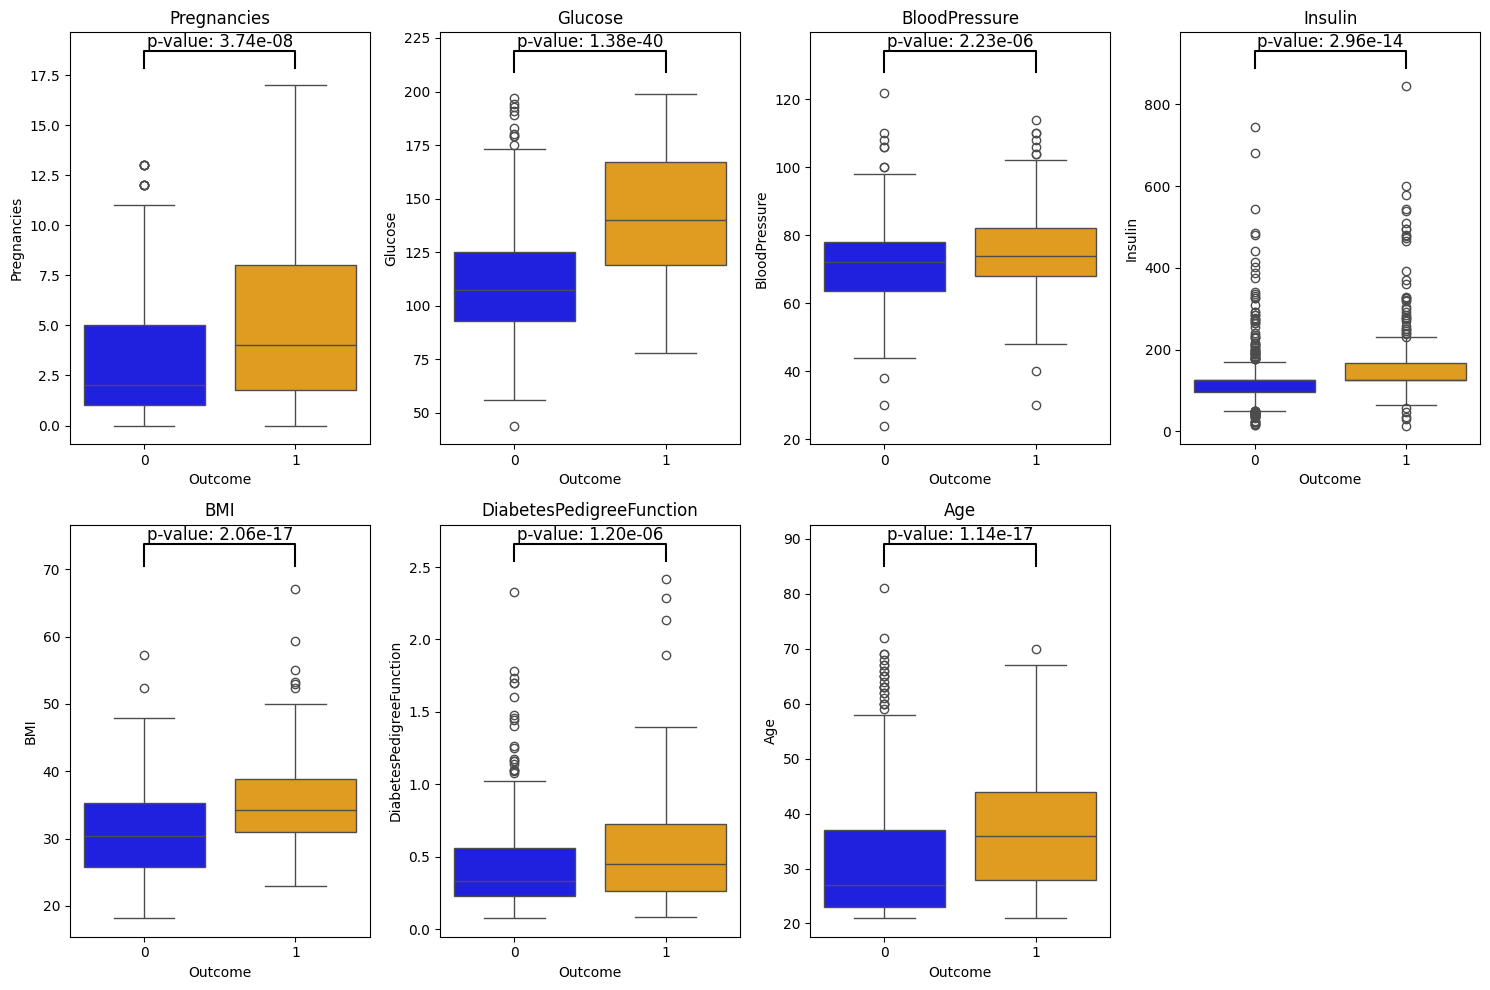

In [39]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outcome_column = 'Outcome'

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

colors = ['blue', 'orange']

for i, column in enumerate(columns):
    sns.boxplot(x=outcome_column, y=column, data=df, ax=axes[i], palette=colors)
    stat, pvalue = kruskal(df[df[outcome_column] == 0][column], df[df[outcome_column] == 1][column])
    max_value = df[column].max()
    y, h, col = max_value + (max_value * 0.05), max_value * 0.05, 'k'
    axes[i].plot([0, 0, 1, 1], [y, y+h, y+h, y], lw=1.5, c=col)
    axes[i].text(0.5, y+h, f'p-value: {pvalue:.2e}', ha='center', va='bottom', color=col, fontsize=12)
    axes[i].set_title(column)

# Supprimer le dernier axe vide
fig.delaxes(axes[-1])
plt.tight_layout()

plt.show()

**La colonne Age**

Transformation des variables

StandardScaler et MinMaxScaler


In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler
"""scaler = StandardScaler()
df['Age_scaled'] = scaler.fit_transform(df[['Age']])
print(df[['Age', 'Age_scaled']].head())

# MinMaxScaler
scaler = MinMaxScaler()
df['Age_normalized'] = scaler.fit_transform(df[['Age']])
print(df[['Age', 'Age_normalized']].head())
"""

"scaler = StandardScaler()\ndf['Age_scaled'] = scaler.fit_transform(df[['Age']])\nprint(df[['Age', 'Age_scaled']].head())\n\n# MinMaxScaler\nscaler = MinMaxScaler()\ndf['Age_normalized'] = scaler.fit_transform(df[['Age']])\nprint(df[['Age', 'Age_normalized']].head())\n"

Transformation des Variables

StandardScaler et MinMaxScaler

StandardScaler :

Description : Standardise les caractéristiques en les centrant et en les réduisant (mean=0, variance=1).

Interprétation : La transformation StandardScaler rend chaque caractéristique comparablement importante en termes de magnitude. Cela est particulièrement utile pour les algorithmes sensibles aux échelles des données, tels que les réseaux de neurones ou les SVM.

Exemple :
Si Age avait une moyenne de 50 ans et un écart-type de 10 ans, une personne de 60 ans aurait une valeur transformée de 1 (car (60-50)/10 = 1).

MinMaxScaler :

Description : Met à l'échelle les caractéristiques dans un intervalle défini, généralement [0, 1].

Interprétation : La transformation MinMaxScaler conserve la distribution des données d'origine mais les met à l'échelle dans une plage spécifique. Cela peut être utile pour les algorithmes basés sur des distances comme k-NN ou les algorithmes de gradient.


L'interprétation des transformations et de la discrétisation (binning) des variables peut être essentielle pour comprendre comment ces transformations affectent vos modèles et vos analyses. Voici une explication détaillée pour chaque technique :

Transformation des Variables
StandardScaler et MinMaxScaler
StandardScaler :

Description : Standardise les caractéristiques en les centrant et en les réduisant (mean=0, variance=1).
Interprétation : La transformation StandardScaler rend chaque caractéristique comparablement importante en termes de magnitude. Cela est particulièrement utile pour les algorithmes sensibles aux échelles des données, tels que les réseaux de neurones ou les SVM.
Exemple :
Si Age avait une moyenne de 50 ans et un écart-type de 10 ans, une personne de 60 ans aurait une valeur transformée de 1 (car (60-50)/10 = 1).
MinMaxScaler :

Description : Met à l'échelle les caractéristiques dans un intervalle défini, généralement [0, 1].
Interprétation : La transformation MinMaxScaler conserve la distribution des données d'origine mais les met à l'échelle dans une plage spécifique. Cela peut être utile pour les algorithmes basés sur des distances comme k-NN ou les algorithmes de gradient.
Exemple :
Si Age varie de 20 à 80 ans, une personne de 50 ans serait transformée en (50-20)/(80-20) = 0.5.
Discrétisation (Binning)
KBinsDiscretizer :

Description : Divise une variable continue en intervalles discrets (ou bins).
Interprétation : La discrétisation peut simplifier les relations non linéaires complexes entre une variable continue et la variable cible en transformant la variable en plusieurs catégories. Cela permet aux modèles de capturer des patterns spécifiques à certaines plages de valeurs.
Exemple :
En divisant Age en 5 bins uniformes, une personne de 50 ans pourrait être placée dans le troisième bin (par exemple, 40-50 ans).

Interprétation :

Age_scaled montre comment chaque valeur d'âge a été transformée pour avoir une moyenne de 0 et une variance de 1.
Age_normalized montre comment chaque valeur d'âge a été transformée pour être comprise entre 0 et 1

In [41]:
# Discrétisation (Binning)
"""from sklearn.preprocessing import KBinsDiscretizer

# Diviser l'âge en 5 bins
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['Age_binned'] = kbins.fit_transform(df[['Age']])
print(df[['Age', 'Age_binned']].head())
"""

"from sklearn.preprocessing import KBinsDiscretizer\n\n# Diviser l'âge en 5 bins\nkbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')\ndf['Age_binned'] = kbins.fit_transform(df[['Age']])\nprint(df[['Age', 'Age_binned']].head())\n"

Interprétation :

Age_binned montre dans quel intervalle (ou bin) chaque valeur d'âge tombe. Par exemple, une valeur de 2 dans Age_binned pourrait correspondre au troisième intervalle (bin) de valeurs d'âge.

Décision

Avantages de la Discrétisation :

Réduction de la Variabilité : Simplifie les données en réduisant la variabilité.
Capturer des Relations Non Linéaires : Peut aider à capturer des relations non linéaires que les modèles linéaires pourraient manquer.

Robustesse aux Outliers : Moins sensible aux valeurs aberrantes, car elles sont regroupées dans les mêmes bins.

Inconvénients de la Discrétisation :


Perte d'Information : Peut entraîner une perte d'information détaillée, car les valeurs sont groupées.

Choix des Intervalles : Le choix des intervalles peut être arbitraire et affecter les résultats du modèle.

Conclusion

Pour décider de garder ou d'éliminer la colonne Age_binned :

Garder la colonne Age_binned si :

Vous souhaitez capturer des relations non linéaires.

Vous avez observé que la discrétisation améliore la performance du modèle lors de la validation croisée.

Éliminer la colonne Age_binned si :

Vous préférez utiliser des informations continues et précises.
La performance du modèle n'est pas améliorée ou est dégradée avec la discrétisation.

Il est souvent bénéfique de tester les deux approches (avec Age normalisé et avec Age binned) et comparer les performances du modèle.

Vous pouvez utiliser des techniques de validation croisée pour évaluer l'impact des différentes transformations.

In [42]:
# Sélection des variables
# Importance des variables avec RandomForest

"""from sklearn.ensemble import RandomForestClassifier

# Séparer les features (X) et la cible (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Entraîner le modèle
model = RandomForestClassifier()
model.fit(X, y)

# Afficher l'importance des variables
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))"""

"from sklearn.ensemble import RandomForestClassifier\n\n# Séparer les features (X) et la cible (y)\nX = df.drop(columns=['Outcome'])\ny = df['Outcome']\n# Entraîner le modèle\nmodel = RandomForestClassifier()\nmodel.fit(X, y)\n\n# Afficher l'importance des variables\nimportances = model.feature_importances_\nfeature_names = X.columns\nimportance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})\nprint(importance_df.sort_values(by='Importance', ascending=False))"

In [43]:
# Sélection par RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
"""
X = df.drop(columns=['Outcome'])
  # Features
y = df['Outcome']  # Target variable
# Utiliser la régression logistique pour l'élimination récursive
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # Sélectionner les 10 meilleures caractéristiques
fit = rfe.fit(X, y)

# Afficher les variables sélectionnées
selected_features = X.columns[fit.support_]
print(selected_features)
"""

"\nX = df.drop(columns=['Outcome'])\n  # Features\ny = df['Outcome']  # Target variable\n# Utiliser la régression logistique pour l'élimination récursive\nmodel = LogisticRegression(max_iter=1000)\nrfe = RFE(model, n_features_to_select=10)  # Sélectionner les 10 meilleures caractéristiques\nfit = rfe.fit(X, y)\n\n# Afficher les variables sélectionnées\nselected_features = X.columns[fit.support_]\nprint(selected_features)\n"

In [44]:
# Évaluation de la relation non linéaire
# Polynômes et splines
# Polynômes
"""
from sklearn.preprocessing import PolynomialFeatures

# Transformation polynomiale de degré 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Age']])

# Inclure les nouvelles caractéristiques dans le dataset
poly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['Age']))
df = pd.concat([df, poly_features], axis=1)
"""

"\nfrom sklearn.preprocessing import PolynomialFeatures\n\n# Transformation polynomiale de degré 2\npoly = PolynomialFeatures(degree=2)\nX_poly = poly.fit_transform(df[['Age']])\n\n# Inclure les nouvelles caractéristiques dans le dataset\npoly_features = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['Age']))\ndf = pd.concat([df, poly_features], axis=1)\n"

In [45]:
# print(df.head(5))

In [46]:
# Splines

from patsy import dmatrix
"""

# Transformation spline pour l'âge avec spécification des degrés de liberté
spline = dmatrix("bs(df['Age'], df=4, include_intercept=False)",
                 {"df['Age']": df['Age']}, return_type='dataframe')
df_spline = pd.concat([df, spline], axis=1)
"""

'\n\n# Transformation spline pour l\'âge avec spécification des degrés de liberté\nspline = dmatrix("bs(df[\'Age\'], df=4, include_intercept=False)",\n                 {"df[\'Age\']": df[\'Age\']}, return_type=\'dataframe\')\ndf_spline = pd.concat([df, spline], axis=1)\n'

In [47]:
"""print(df_spline.head())"""

'print(df_spline.head())'

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import make_scorer, accuracy_score


# Séparer les caractéristiques et la cible
X = df.drop(columns='Outcome')
y = df['Outcome']

# Appliquer une transformation pour réduire l'impact des outliers
qt = QuantileTransformer(output_distribution='normal')
X['Insulin'] = qt.fit_transform(X[['Insulin']])


In [49]:
sum(y)/len(y)

0.3489583333333333

In [50]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [51]:
sum(y_train)/len(y_train)

0.3489583333333333

In [52]:
sum(y_test)/len(y_test)

0.3489583333333333

In [53]:
# Définir la grille des hyperparamètres à tester pour RandomForest
"""param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Configurer GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=make_scorer(accuracy_score))

# Entraîner GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')
"""


"param_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [10, 20, 30, None],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'max_features': ['auto', 'sqrt', 'log2'],\n    'bootstrap': [True, False]\n}\n\n# Configurer GridSearchCV\nrf_model = RandomForestClassifier(random_state=42)\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=make_scorer(accuracy_score))\n\n# Entraîner GridSearchCV\ngrid_search.fit(X_train, y_train)\n\n# Meilleurs hyperparamètres trouvés\nbest_params = grid_search.best_params_\nprint(f'Best parameters found: {best_params}')\n"

In [54]:
# Entraîner le modèle avec RandomForest avec les meilleurs hyperparamètres
"""best_rf_model = RandomForestClassifier(bootstrap = True, max_depth = 20,
                                       max_features= 'auto', min_samples_leaf= 2,
                                       min_samples_split = 2, n_estimators= 300,
                                       random_state=42)
best_rf_model.fit(X_train, y_train)

# Évaluer le modèle avec la validation croisée
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(best_rf_model, X, y, cv=5)
print(f'Scores de validation croisée (Optimized Random Forest) : {rf_scores}')
print(f'Score moyen (Optimized Random Forest) : {rf_scores.mean()}')"""


"best_rf_model = RandomForestClassifier(bootstrap = True, max_depth = 20,\n                                       max_features= 'auto', min_samples_leaf= 2,\n                                       min_samples_split = 2, n_estimators= 300,\n                                       random_state=42)\nbest_rf_model.fit(X_train, y_train)\n\n# Évaluer le modèle avec la validation croisée\nfrom sklearn.model_selection import cross_val_score\nrf_scores = cross_val_score(best_rf_model, X, y, cv=5)\nprint(f'Scores de validation croisée (Optimized Random Forest) : {rf_scores}')\nprint(f'Score moyen (Optimized Random Forest) : {rf_scores.mean()}')"

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
"""
predictions = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non malade', 'Malade'])
disp.plot(values_format='d')
plt.show()
"""

"\npredictions = best_rf_model.predict(X_test)\ncm = confusion_matrix(y_test, predictions)\n\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm,\n                              display_labels=['Non malade', 'Malade'])\ndisp.plot(values_format='d')\nplt.show()\n"

In [56]:
"""import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [300, 350, 400, 500],
    'max_depth': [5],
    'learning_rate': [0.01],
    'subsample': [0.6, 0.7, 0.8, 0.9],  # valeurs valides entre 0 et 1 pour eviter le Overfitting
    'colsample_bytree': [0.8, 0.9, 1.0, 1.1],  # valeurs généralement <= 1.0
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [5, 6, 8, 10, 15, 20],
    'reg_lambda' : [0, 1, 10, 15, 20, 30, 50, 100],
    'scale_pos_weight' : [1, 3, 5]
}

optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic',
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5),
    param_grid=param_grid,
    scoring='roc_auc',
    verbose=0,
    n_jobs=10,
    cv=5
)

# Entraîner GridSearchCV
optimal_params.fit(X_train, y_train,
                   early_stopping_rounds=10,
                   eval_metric='auc',
                   eval_set=[(X_test, y_test)],
                   verbose=False)

# Meilleurs hyperparamètres trouvés
best_params = optimal_params.best_params_
print(f'Best parameters found: {best_params}')
"""

"import xgboost as xgb\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    'n_estimators': [300, 350, 400, 500],\n    'max_depth': [5],\n    'learning_rate': [0.01],\n    'subsample': [0.6, 0.7, 0.8, 0.9],  # valeurs valides entre 0 et 1 pour eviter le Overfitting\n    'colsample_bytree': [0.8, 0.9, 1.0, 1.1],  # valeurs généralement <= 1.0\n    'gamma': [0, 0.1, 0.2],\n    'min_child_weight': [5, 6, 8, 10, 15, 20],\n    'reg_lambda' : [0, 1, 10, 15, 20, 30, 50, 100],\n    'scale_pos_weight' : [1, 3, 5]\n}\n\noptimal_params = GridSearchCV(\n    estimator=xgb.XGBClassifier(objective='binary:logistic',\n                                seed=42,\n                                subsample=0.9,\n                                colsample_bytree=0.5),\n    param_grid=param_grid,\n    scoring='roc_auc',\n    verbose=0,\n    n_jobs=10,\n    cv=5\n)\n\n# Entraîner GridSearchCV\noptimal_params.fit(X_train, y_train,\n                   early_stopping_rounds=10,\n               

In [57]:
# Entraîner le modèle avec XGboost avec les meilleurs hyperparamètres
from xgboost import XGBClassifier
best_xgb_model = XGBClassifier(objective='binary:logistic',
                               colsample_bytree = 0.8,
                               gamma = 0.2,
                               learning_rate = 0.01, max_depth = 5,
                               min_child_weight = 5, n_estimators = 300,
                               subsample = 1.0)
best_xgb_model.fit(X_train, y_train)

# Évaluer le modèle avec la validation croisée
from sklearn.model_selection import cross_val_score
xgb_scores = cross_val_score(best_xgb_model, X, y, cv=5)
print(f'Scores de validation croisée (Optimized XGBoost) : {xgb_scores}')
print(f'Score moyen (Optimized XGBoost) : {xgb_scores.mean()}')


Scores de validation croisée (Optimized XGBoost) : [0.77922078 0.74025974 0.75324675 0.82352941 0.75163399]
Score moyen (Optimized XGBoost) : 0.7695781342840167


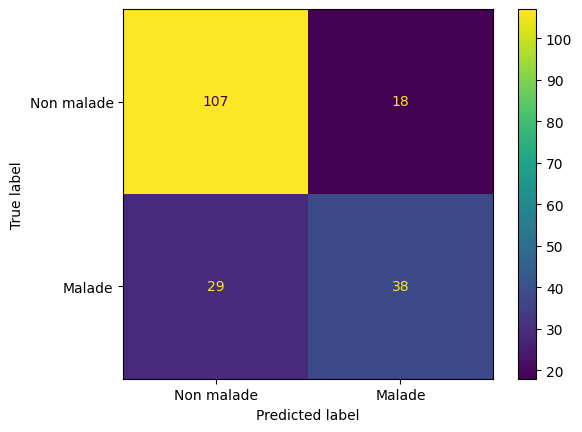

In [58]:
y_pred = best_xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non malade', 'Malade'])
disp.plot(values_format='d')
plt.show()


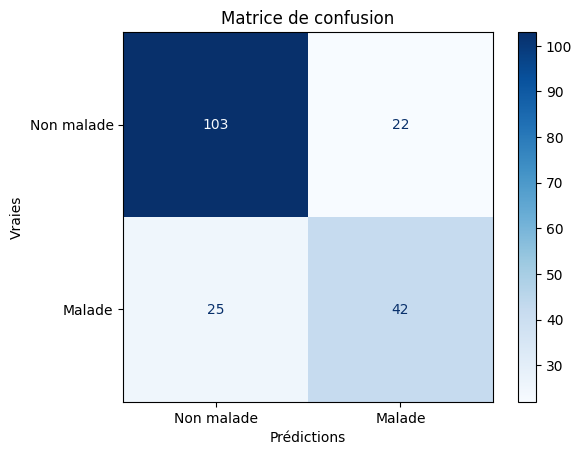

In [59]:
  import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

best_xgb_model = XGBClassifier(objective='binary:logistic', seed=42)
best_xgb_model.fit(X_train, y_train)

y_pred = best_xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non malade', 'Malade'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies')
plt.show()
